In [1]:
%pip install crunch-cli --upgrade
!crunch --notebook setup wise-shroddha --token 4obrJCoUBW9hO3sRd6wr3grEqa4QGqLaGNS89X4Ydk3kvlO3148XTKRLCeOyH1KK
%cd wise-shroddha

Note: you may need to restart the kernel to use updated packages.


wise-shroddha: already exists (use --force to override)
c:\Users\KIIT\Documents\GitHub\ADIA-LABS-MARKET-PREDICTION\wise-shroddha


Aborted!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import requests
warnings.filterwarnings("ignore")
import pandas as pd


In [3]:

# Load the Parquet file
df = pd.read_parquet('C:\\Users\\KIIT\\Documents\\GitHub\\ADIA-LABS-MARKET-PREDICTION\\wise-shroddha\\data\\X_train.parquet')

In [4]:
df

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,-0.909515,0.388808,-1.535913,-0.133312,-1.826404,-0.532795,0.351273,0.158866,...,-0.731349,-0.456020,-0.257331,0.396074,0.318007,-0.538754,-0.625193,-0.753419,0.154403,1.069385
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.107694,-0.097967,-0.539599,-0.331276,-0.942609,-0.054123,-1.212772,1.688034,...,0.610428,-0.984907,-0.429806,0.199055,0.202587,1.612578,0.302153,-0.165713,0.905807,0.083180
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.092316,0.052596,-0.652025,1.218241,0.382968,-0.861838,-0.318937,-0.744261,...,0.212365,-0.046016,1.147463,0.696961,-0.574426,1.255969,0.270394,1.272939,-0.643112,0.433585
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,4.119639,1.018918,3.687519,1.597563,0.055918,-1.406041,0.652994,0.251138,...,1.254787,-1.155922,-1.108540,-2.046100,1.311100,-0.322965,0.999248,-1.238640,0.882844,-1.333590
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,0.109644,-0.290280,-0.278987,-0.603259,0.136952,-1.725076,-0.062219,-0.183102,...,-2.007721,-0.482311,-0.269142,-0.899796,1.083332,0.674665,-1.095657,-0.402669,0.677189,0.319992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742665,268,5a18ddc0f252fa17cbd2a5bfe2f3786c0afb5052dd92be...,0.790984,1.560877,-0.328996,-0.190068,0.314971,-0.001609,0.313957,-0.315743,...,-1.450422,-1.044100,0.631455,-1.322626,-0.407846,0.578026,0.830650,1.414314,-0.845734,0.399335
742666,268,73c197cf1cb75641710562fe26d4f562c8228847a67949...,-1.129492,0.696247,-1.494771,-0.404022,0.909996,-0.658659,0.688591,1.634416,...,-0.475011,0.319023,-1.038112,0.222924,0.804017,-0.969177,-1.011879,-0.921781,-0.067543,0.491890
742667,268,bad7ff9ebc5579589e5ef36cb58f962c90c864fd3dfb22...,1.656413,-1.267060,0.748902,-0.196263,0.831206,-1.590837,3.079856,0.498583,...,-0.010330,-0.426130,-0.624393,-0.236483,-0.244052,1.280749,-2.001158,-1.036838,-1.959235,-2.534523
742668,268,5b968ca44ac0550be6f31470a96e572cd1c58d36cc26c7...,0.282704,0.156104,-1.165022,0.513334,-1.111948,-1.368465,-1.347184,-0.926533,...,0.411093,0.225324,-0.112838,-0.366831,-0.385833,-0.301606,0.395659,-0.895311,-0.819201,-0.996246


In [5]:
# import and instantiante the crunch package in this notebook
import crunch
crunch = crunch.load_notebook(__name__)

loaded inline runner with module: <module '__main__'>


In [6]:
# Getting the data
X_train, y_train, X_test = crunch.load_data()

download data\X_train.parquet from https://datacrunch-com.s3.eu-west-1.amazonaws.com/production/adialab/data-releases/1/X_train.parquet
already exists: file length match
download data\y_train.parquet from https://datacrunch-com.s3.eu-west-1.amazonaws.com/production/adialab/data-releases/1/y_train.parquet
already exists: file length match
download data\X_test.parquet from https://datacrunch-com.s3.eu-west-1.amazonaws.com/production/adialab/data-releases/1/X_test_reduced.parquet
already exists: file length match


In [7]:
X_train.head()

,date,id,0,1,2,3,4,5,6,7,...,451,452,453,454,455,456,457,458,459,460
0,0,dae29c8061b3176b9208f26afbb96e2ca50886db41902d...,-0.909515,0.388808,-1.535913,-0.133312,-1.826404,-0.532795,0.351273,0.158866,...,-0.731349,-0.456020,-0.257331,0.396074,0.318007,-0.538754,-0.625193,-0.753419,0.154403,1.069385
1,0,2f71f1b5d49fbd131351df95848dc91ab14662af62d4d0...,-0.107694,-0.097967,-0.539599,-0.331276,-0.942609,-0.054123,-1.212772,1.688034,...,0.610428,-0.984907,-0.429806,0.199055,0.202587,1.612578,0.302153,-0.165713,0.905807,0.083180
2,0,b8d41ef950b69f94c380410f59f47e15666c57b74573b6...,0.092316,0.052596,-0.652025,1.218241,0.382968,-0.861838,-0.318937,-0.744261,...,0.212365,-0.046016,1.147463,0.696961,-0.574426,1.255969,0.270394,1.272939,-0.643112,0.433585
3,0,cdce060d04ce28a551eaab653cc4b01f5ad878aeb932ec...,4.119639,1.018918,3.687519,1.597563,0.055918,-1.406041,0.652994,0.251138,...,1.254787,-1.155922,-1.108540,-2.046100,1.311100,-0.322965,0.999248,-1.238640,0.882844,-1.333590
4,0,86f6e6d9407ad3abfab91a3bbfb7ad71553e3f968765b8...,0.109644,-0.290280,-0.278987,-0.603259,0.136952,-1.725076,-0.062219,-0.183102,...,-2.007721,-0.482311,-0.269142,-0.899796,1.083332,0.674665,-1.095657,-0.402669,0.677189,0.319992


In [8]:
X_train.shape

(742670, 463)

In [9]:
X_train.describe()

,date,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,460
count,742670.000000,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,...,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05,7.426700e+05
mean,159.526463,2.086688e-12,-4.715113e-10,1.052975e-10,5.060821e-10,8.000042e-10,-4.883653e-10,-1.422078e-09,-9.743229e-11,9.895718e-10,...,4.215712e-10,-6.330290e-10,-2.174971e-11,-5.764476e-10,-1.341901e-10,-8.443864e-10,1.940733e-10,7.439846e-10,-5.248021e-10,-3.009948e-10
std,69.838953,9.998164e-01,9.998159e-01,9.998288e-01,9.998107e-01,9.998293e-01,9.998216e-01,9.998166e-01,9.998174e-01,9.998305e-01,...,9.998324e-01,9.998296e-01,9.998224e-01,9.998137e-01,9.998322e-01,9.998174e-01,9.998388e-01,9.998257e-01,9.998323e-01,9.998116e-01
min,0.000000,-6.261024e+00,-5.071468e+00,-4.707472e+00,-9.938923e+00,-6.866098e+00,-6.654506e+00,-1.001759e+01,-9.518451e+00,-7.745412e+00,...,-8.473229e+00,-4.633243e+00,-8.560513e+00,-4.718935e+00,-7.037115e+00,-4.417604e+00,-9.344660e+00,-5.903621e+00,-1.334405e+01,-1.028470e+01
25%,110.000000,-6.739395e-01,-6.541329e-01,-6.802955e-01,-5.891749e-01,-6.684516e-01,-6.526968e-01,-5.842146e-01,-6.634518e-01,-6.518828e-01,...,-6.648314e-01,-6.994224e-01,-6.662166e-01,-6.315326e-01,-6.802900e-01,-6.629974e-01,-6.558463e-01,-6.724783e-01,-6.729455e-01,-6.233730e-01
50%,163.000000,-2.538679e-02,-3.315788e-02,-1.790448e-02,3.379633e-02,-1.937055e-02,-5.407786e-03,4.602176e-02,7.003009e-03,-1.642204e-02,...,-2.929448e-03,-3.116671e-02,-2.230417e-03,-6.742083e-03,1.107542e-02,-4.374430e-02,2.156746e-02,2.368831e-03,2.270385e-03,1.908572e-02
75%,220.000000,6.563462e-01,6.099522e-01,6.501519e-01,6.565697e-01,6.498887e-01,6.430400e-01,6.505666e-01,6.668940e-01,6.300462e-01,...,6.564976e-01,6.558738e-01,6.619603e-01,6.061414e-01,6.775671e-01,6.045398e-01,6.844997e-01,6.601428e-01,6.774270e-01,6.585824e-01
max,268.000000,5.421272e+00,9.006263e+00,7.850448e+00,4.292451e+00,9.759359e+00,6.516186e+00,4.168461e+00,5.217637e+00,1.240517e+01,...,9.845173e+00,1.008965e+01,5.559939e+00,1.017363e+01,6.631126e+00,9.228049e+00,4.661901e+00,6.826565e+00,5.865996e+00,4.717035e+00


In [10]:
X_train.nunique()

date       269
id      742670
0       738465
1       738611
2       738495
         ...  
456     738565
457     738468
458     738541
459     738443
460     738557
Length: 463, dtype: int64

<AxesSubplot:>

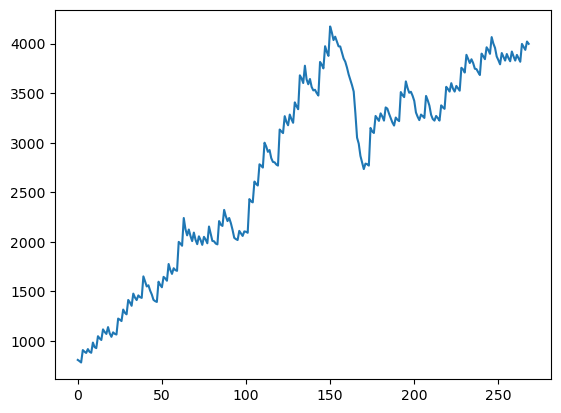

In [11]:
# check the distribution of data points across dates
X_train['date'].value_counts().sort_index().plot()

<AxesSubplot:xlabel='date'>

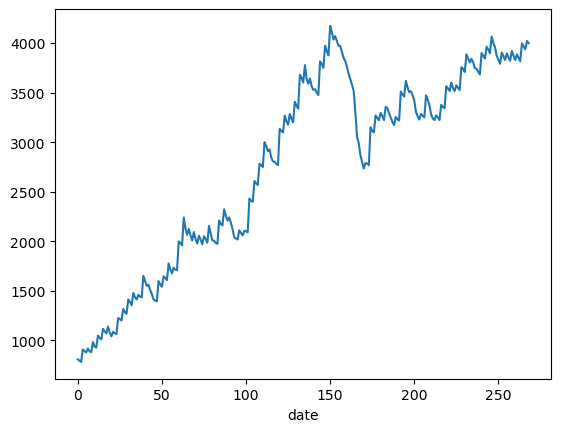

In [12]:
# number of assets per periods in the universe
X_train.groupby('date')['id'].nunique().plot()

In [13]:
y_train.nunique()

date       269
id      742670
y       531364
dtype: int64

In [14]:
# check the null value distribution
X_train.isnull().sum()

date    0
id      0
0       0
1       0
2       0
       ..
456     0
457     0
458     0
459     0
460     0
Length: 463, dtype: int64

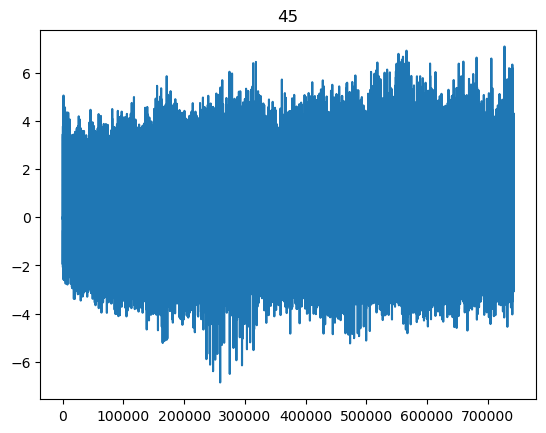

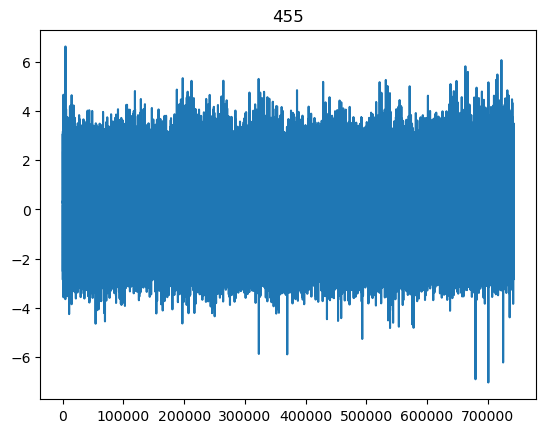

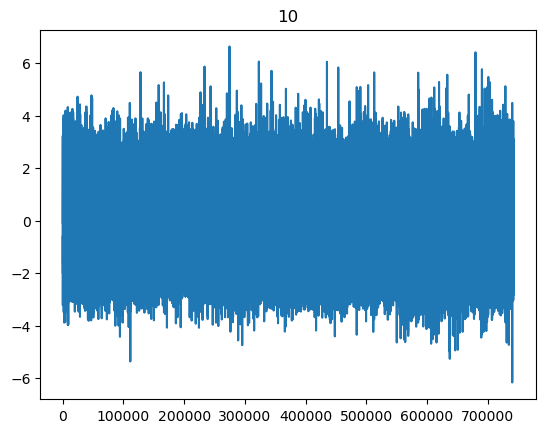

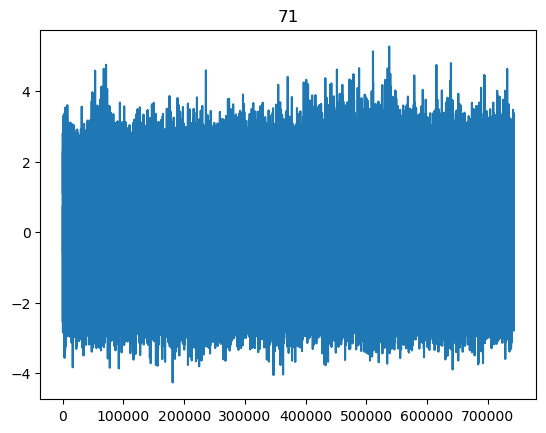

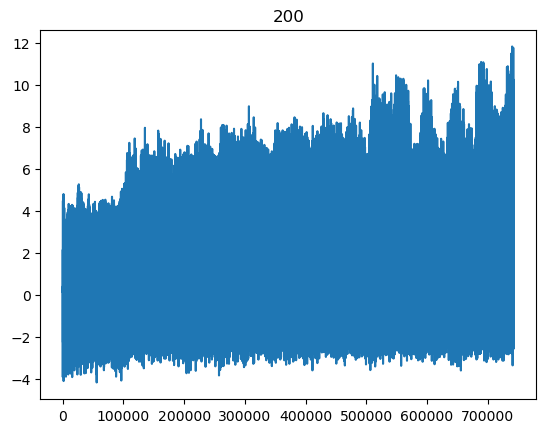

In [15]:
# We should now plot some of the features and observe them under different smoothing values. We do this in order to visually uncover dominant trends that otherwise may be obscured by noise or high volatility. Notice that by plotting features directly we are not accounting for the dates separation of values. This however still lets us understand global information about the universe. Namely, if features exhibit clear trends, then we may be able to interpret that effect as "universe drift". If universe drift is present, it could be an interesting effect to harness in our predictions

features=['45','455','10','71','200']
for feature in features:
    X_train[feature].plot()
    plt.title(feature)
    plt.show()



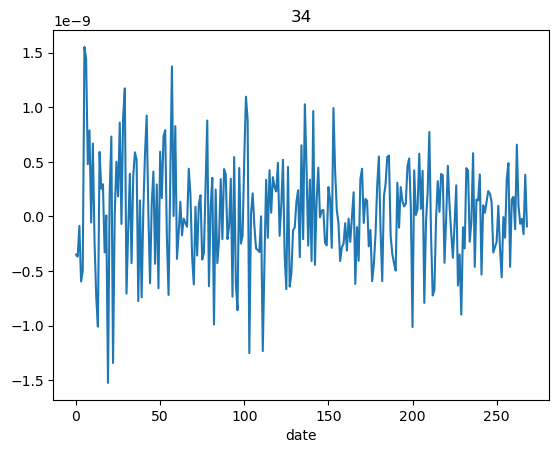

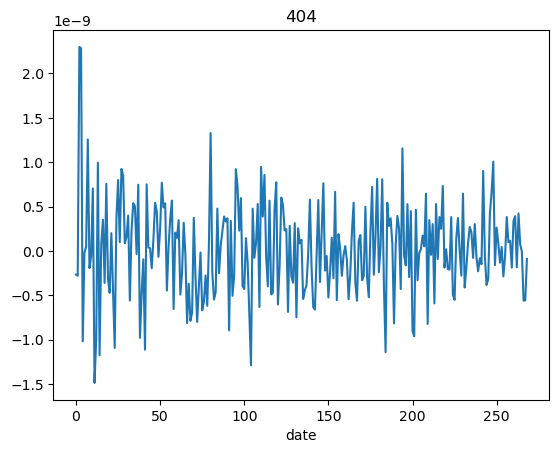

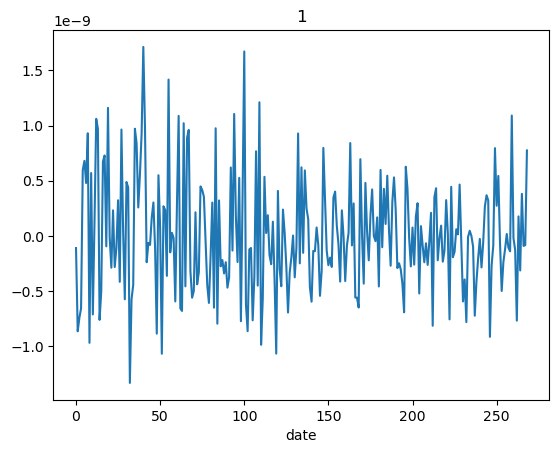

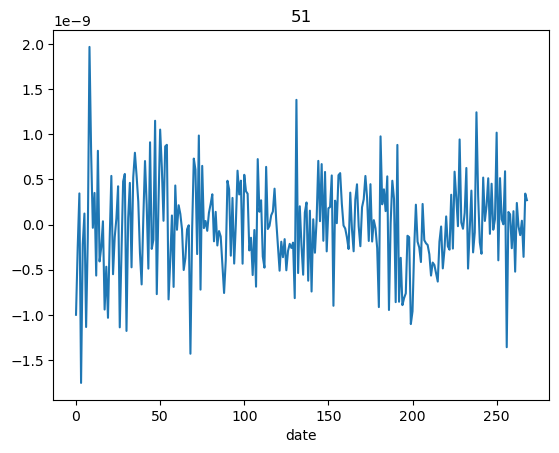

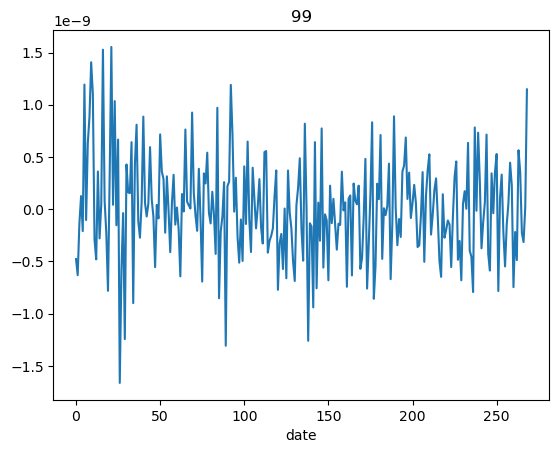

In [16]:
#mean per date plot of selected feature
features=['34','404','1','51','99']
for feature in features:
    X_train.groupby('date')[feature].mean().plot()
    plt.title(feature)
    plt.show()
    

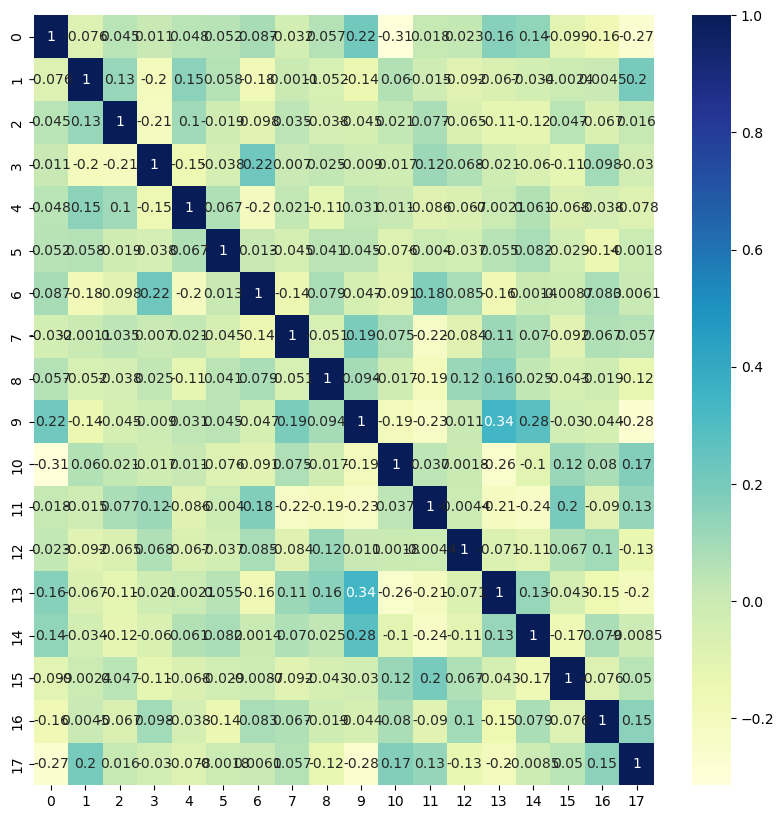

In [17]:
import seaborn as sns
#plot the correlation using numpy for features 2 to 20
corr = X_train.iloc[:,2:20].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()




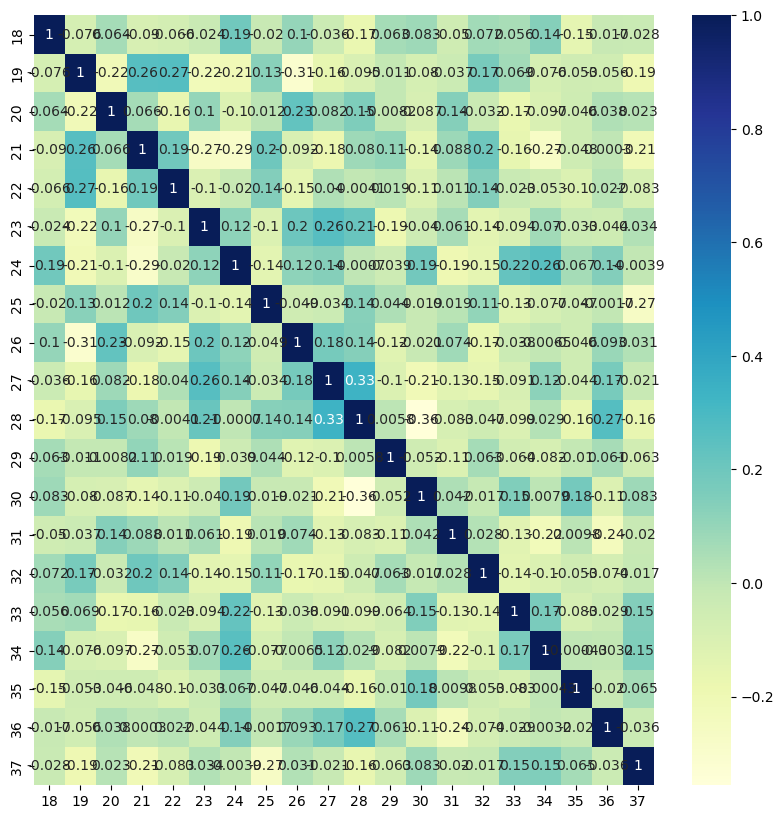

In [18]:
#plot the correlation using numpy for features 20 to 60
corr = X_train.iloc[:,20:40].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


In [19]:
#strongest available case is of negative correlation using numerical exploration
corr = np.corrcoef(X_train.iloc[:,2:],rowvar=False)
np.min(corr)

-0.49675897165763333

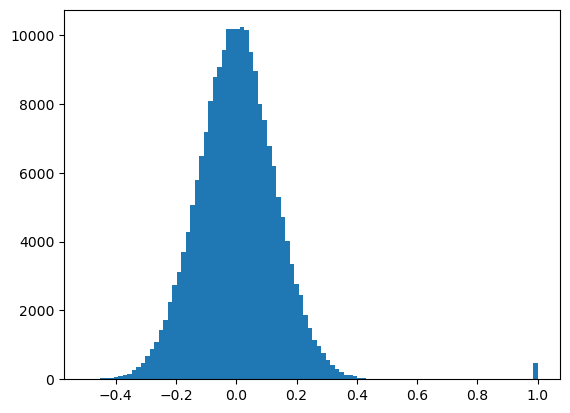

In [20]:
# The maximum value smaller than one can be deduced to correspond to the first non-trivial correlation comparison between variables (first distinct variables case). Let us check the values in a histogram.
plt.hist(corr.flatten(),bins=100)
plt.show()


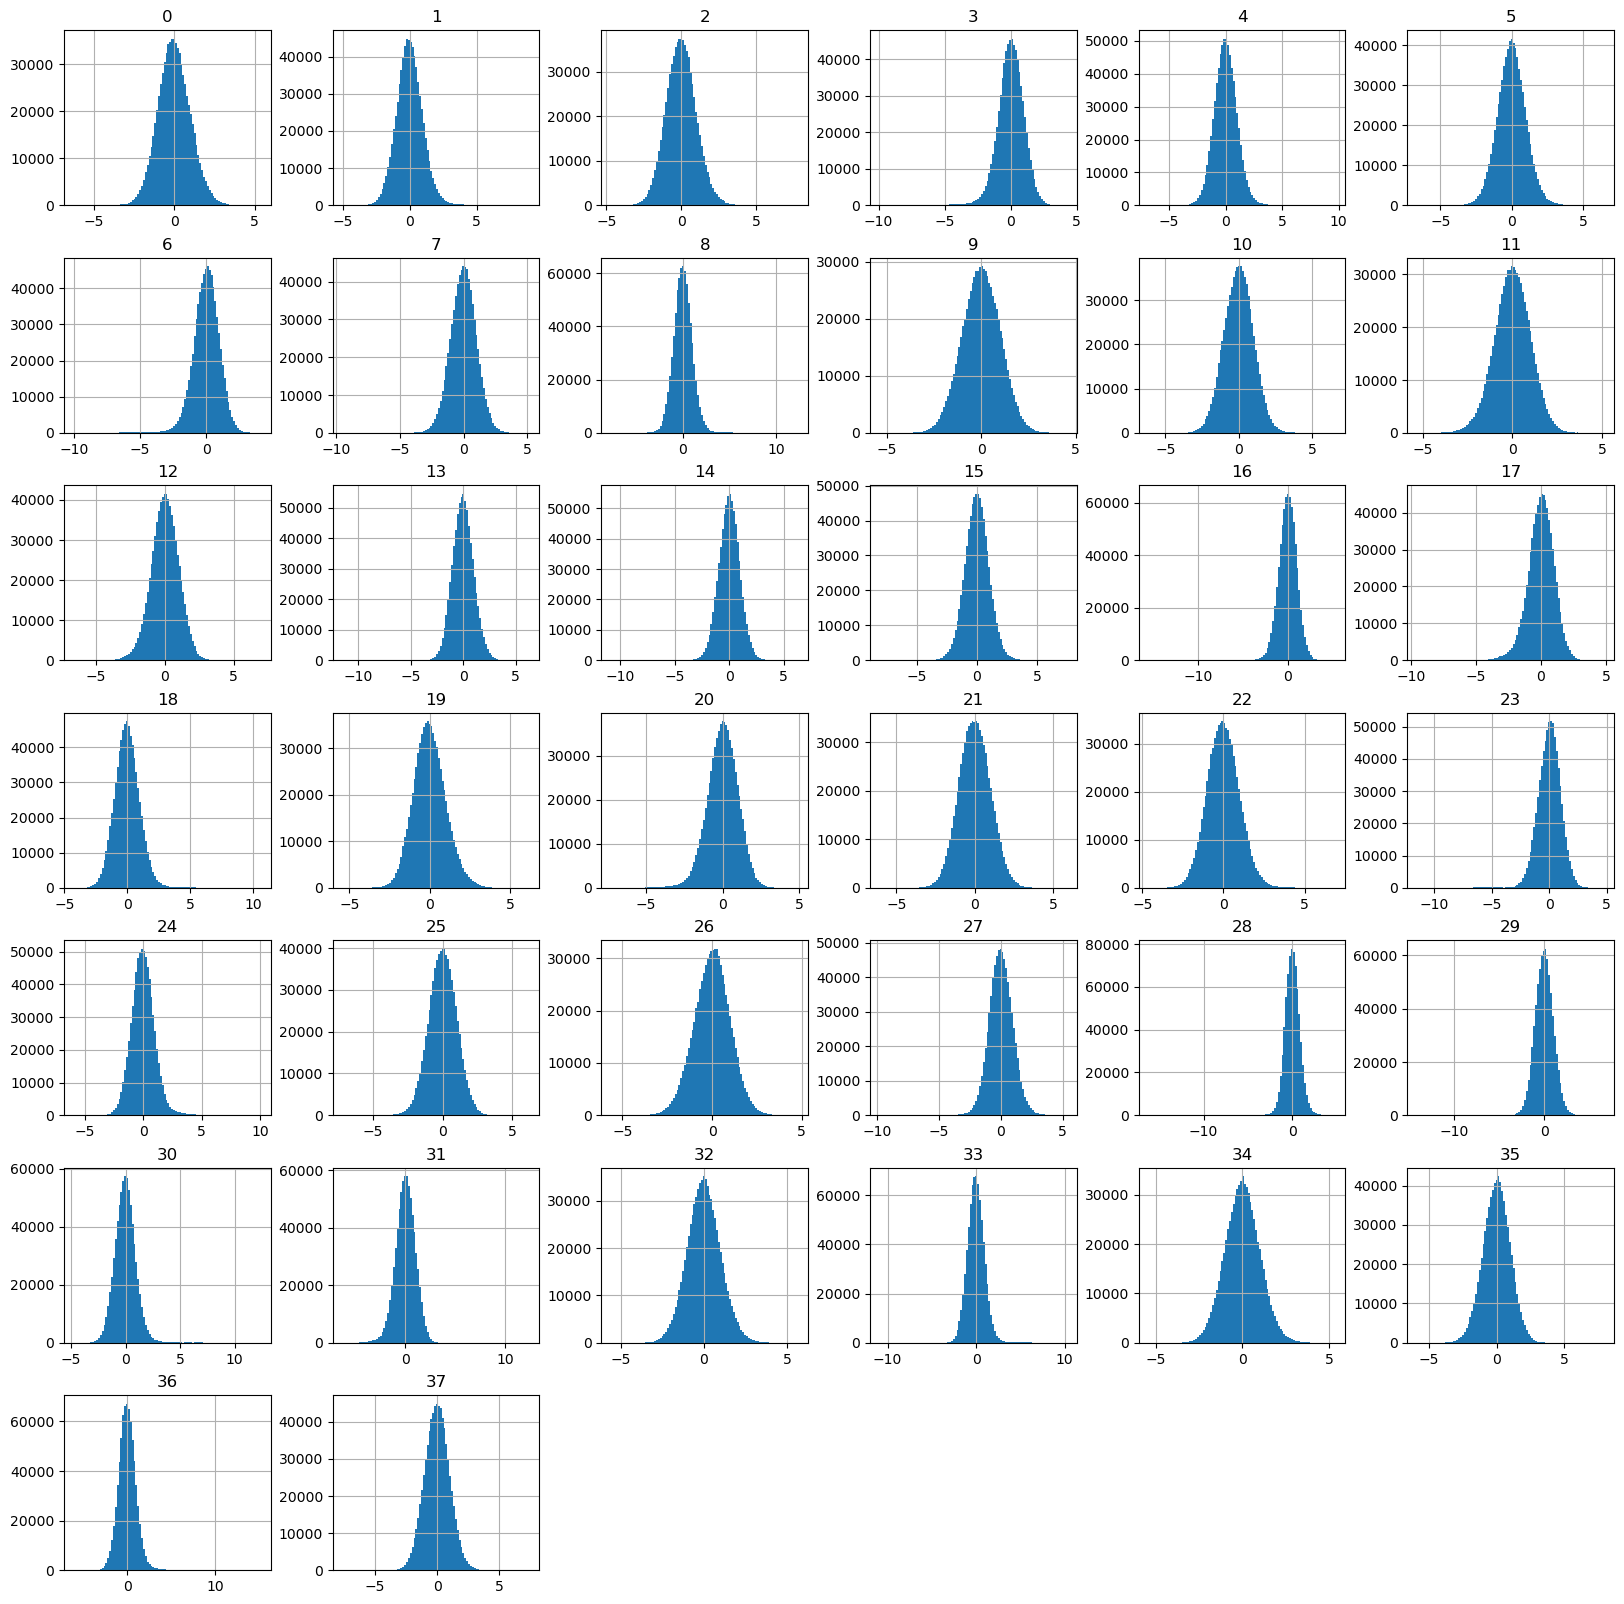

In [21]:
# frequency by which values or ranges of values occur in each feature 
X_train.iloc[:,2:40].hist(bins=100,figsize=(20,20))
plt.show()


In [23]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [24]:
from statsmodels.graphics.gofplots import qqplot

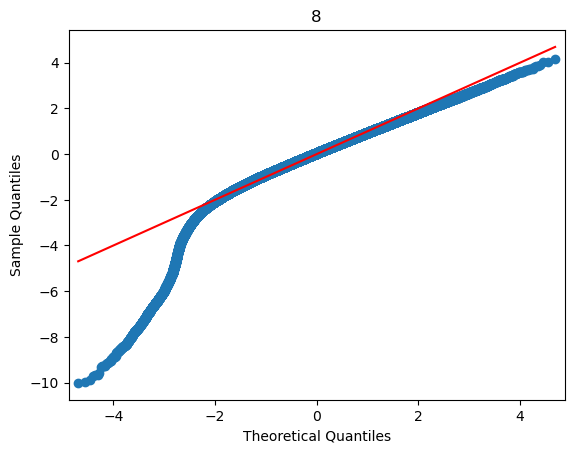

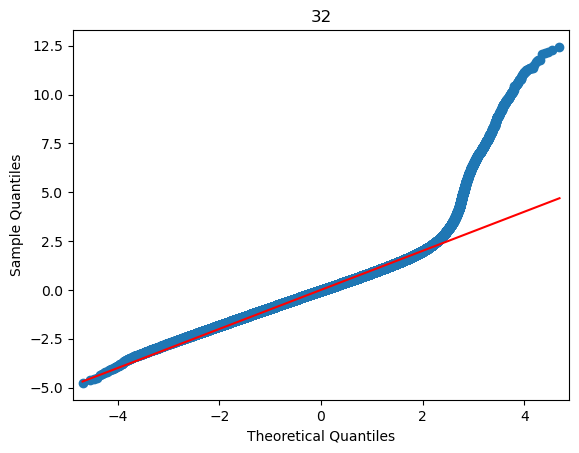

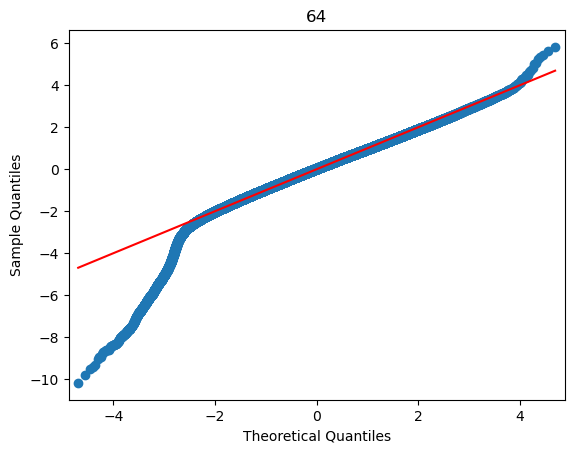

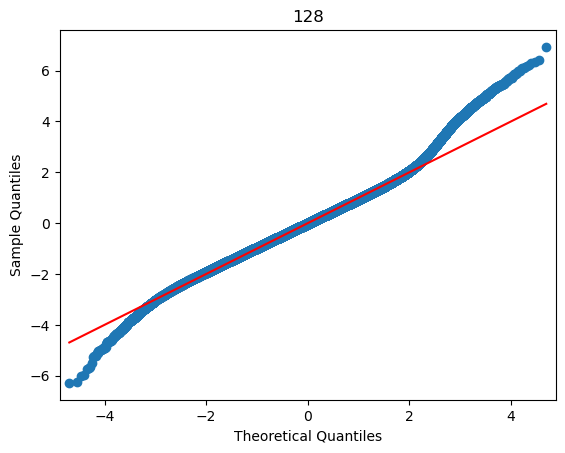

In [25]:
# The qqplot allows one to visually assess the degree of Gaussianity of a feature, by noticing how well the samples of the feature of analysis fit to the red line in the plot. Better fit implies closer to a pure Gaussian distribution.
feats = [8,32,64,128]
for feat in feats:
    qqplot(X_train.iloc[:,feat],line='s')
    plt.title(feat)
    plt.show()


In [26]:
from scipy.stats import shapiro

In [27]:
# hypothesis tests for Gaussianity
feats = [8,32,64,128]
for feat in feats:
    stat, p = shapiro(X_train.iloc[:,feat])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

        

Statistics=0.963, p=0.000
Probably not Gaussian
Statistics=0.949, p=0.000
Probably not Gaussian
Statistics=0.983, p=0.000
Probably not Gaussian
Statistics=0.992, p=0.000
Probably not Gaussian


In [29]:
from scipy.stats import anderson

# hypothesis tests for Gaussianity
feats = [130,150,200,250,300]
for feat in feats:
    result = anderson(X_train.iloc[:,feat])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl))



Statistic: 25.509
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 205.612
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 39.703
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 49.129
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
Statistic: 6.142
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussia

In [30]:
#feature engineering
# We will now create a new feature that will be the average of the 5 features with the highest correlation with the target. We will then plot the new feature and the target to see if there is a clear relationship between them.
corr = X_train.corrwith(y_train)
corr = corr.abs().sort_values(ascending=False)
corr = corr[~corr.index.isin(['date','id'])]
corr = corr[:5]
corr


0     NaN
1     NaN
10    NaN
100   NaN
101   NaN
dtype: float64

In [36]:
# dropping the id feature
X_train = X_train.drop(['id'], axis=1)

In [40]:
y_train = y_train.drop(['id'], axis=1)

In [31]:
# Imports
import xgboost as xgb
import pandas as pd
import typing
import joblib
from pathlib import Path

In [37]:
#train the model using xgb regressor
def train_model(X_train: pd.DataFrame, y_train: pd.Series) -> typing.Any:
    """Train a model using the given training data.

    Args:
        X_train (pd.DataFrame): Training data features.
        y_train (pd.Series): Training data targets.

    Returns:
        typing.Any: Trained model.
    """
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    return model


In [33]:

#save the model
def save_model(model: typing.Any, output_dir: Path = "model") -> None:
    """Save a trained model to the given output directory.

    Args:
        model (typing.Any): Trained model.
        output_dir (Path, optional): Output directory. Defaults to "model".
    """
    output_dir.mkdir(parents=True, exist_ok=True)
    output_path = output_dir / "model.pkl"
    joblib.dump(model, output_path)


In [41]:

#train the model
model = train_model(X_train, y_train)

#save the model
save_model(model)


In [ ]:

#load the model
def load_model(input_dir: Path = "model") -> typing.Any:
    """Load a trained model from the given input directory.

    Args:
        input_dir (Path, optional): Input directory. Defaults to "model".

    Returns:
        typing.Any: Trained model.
    """
    input_path = input_dir / "model.pkl"
    model = joblib.load(input_path)
    return model

#load the model
model = load_model()

#predict the model
def predict(model: typing.Any, X: pd.DataFrame) -> pd.Series:
    """Make predictions using the given model and features.

    Args:
        model (typing.Any): Trained model.
        X (pd.DataFrame): Input features.

    Returns:
        pd.Series: Predictions.
    """
    predictions = model.predict(X)
    return pd.Series(predictions, index=X.index, name="target")

